Suppose the system we are interested in grows exponentially in time.

In [105]:
import kreisspy
import numpy as np
import matplotlib.pyplot as plt

In [106]:
M = np.array([[3,2],[9,4]])
ct=kreisspy.characterize_transient(M)
print(ct)

[array([7.77200187+0.j]), 9.02268050859363, 2.0342002895570924e+16, 4.831633453867446, (6.999999999999999+0j)]


In [ ]:
t=np.arange(0,1,.04)
kreisspy.plot(t,M,[1,1],plot_all=False)
plt.yscale('log')
plt.autoscale(enable=True, axis='y', tight=True)
plt.plot(t,np.exp(ct[0]*t),color="orange")
plt.legend(["Evolution with $M$","evolution with $\lambda_{Max}$"])
plt.savefig("non-normal-ev.png")

The Kreiss constant is $K_0 \approx 10^{16}$ which makes sense since exponentially growing systems will always saturate any minimum bound. However, this doesn't give us any useful information. Is there any way to get a good estimate for the transient properties of this system? The answer is, in fact, yes. Consider the ratio of maximum transient growth to maximum regular growth $$\frac{e^{\boldsymbol{M}t}}{e^{\lambda_{\text{max}}t}}$$ This is the solution to the associated kinematical system $$\dot{x}=\left(\boldsymbol{M}-\lambda_{\text{max}}\right)x$$ If we now characterize the transients of $\boldsymbol{M}-\lambda_{\text{max}}$ we get:

In [104]:
MmL = M - np.identity(len(M))*ct[0]
ctML = kreisspy.characterize_transient(MmL)
print(ctML)
print(np.around(np.array(ctML,dtype=np.complex64),5))

[array([-5.29479181e-16+0.j]), 1.2506786359348645, 1.2927009654444133, 256.7338011508474, (7+0j)]
[ -0.     +0.j   1.25068+0.j   1.2927 +0.j 256.7338 +0.j   7.     +0.j]


/home/ab/python/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


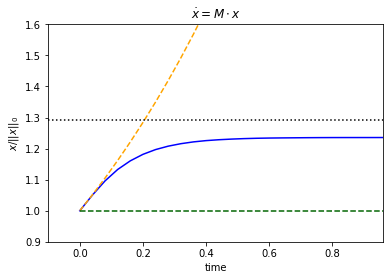

In [94]:
kreisspy.plot(t,MmL,[1,1],plot_all=False,matrix_characteristic=True)
plt.autoscale(enable=True, axis='y')
plt.ylim([0.9,1.6])
plt.savefig("transient-sat.png")

we see that now the Kreiss constant represents the maximum that the ratio $$\frac{e^{\boldsymbol{M}t}}{e^{\lambda_{\text{max}}t}}$$ can attain when optimized over the initial conditions. Thus, given the evolution equation
$$\dot{x}=\boldsymbol{M}x$$ we can write an approximate form of the solution as $$x(t) = \mathcal{K}\left(\boldsymbol{M}-\lambda_\text{max}\right){e^{\lambda_{\text{max}}t}}x_0$$ such that the effect of the transient is to essentially amplify the initial condition $$x_0\rightarrow \mathcal{K}\left(\boldsymbol{M}-\lambda_\text{max}\right) x_0$$

/home/ab/python/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ab/python/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


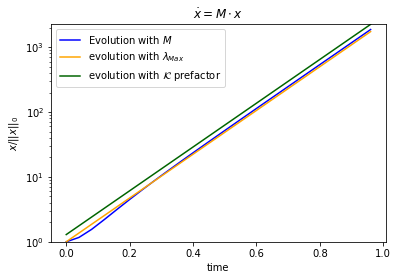

In [97]:
t=np.arange(0,1,.04)
kreisspy.plot(t,M,[1,-.1],plot_all=False)
plt.yscale('log')
plt.autoscale(enable=True, axis='y', tight=True)
plt.plot(t,np.exp(ct[0]*t),color="orange")
plt.plot(t,ctML[2]*np.exp(ct[0]*t),color="darkgreen")
plt.legend(["Evolution with $M$","evolution with $\lambda_{Max}$","evolution with $\mathcal{K}$ prefactor"])
plt.savefig("transient-est.png")

This shows that the non-normality of a matrix can be encapsulated by the largest eigenvalue in addition to a prefactor multiplying the initial condition. This is fully generalizable to NxN networks.